In [4]:
# import the libraries
import pandas as pd
import seaborn as sns

In [3]:
%%capture
pip install pandas seaborn

In [5]:
df = sns.load_dataset("tips")

In [6]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [7]:
# missing values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<Axes: ylabel='total_bill'>

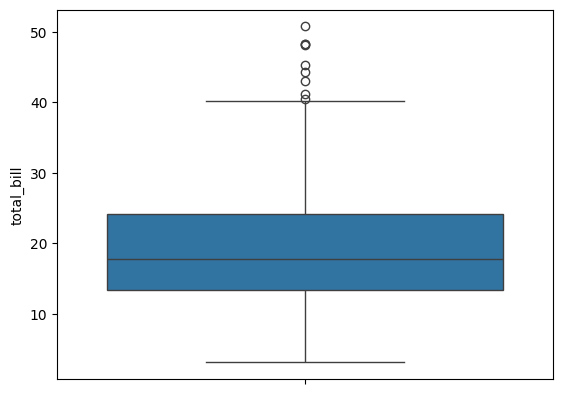

In [8]:
sns.boxplot(df["total_bill"])

In [12]:
# we are treating the outliers
# capping
# upper_limit = q3+1.5*IQR
# Lower_limit = q1-1.5*IQR
q1=df.describe()["total_bill"]["25%"]

In [13]:
q3 = df.describe()["total_bill"]["75%"]

In [14]:
IQR = q3-q1

In [15]:
IQR

np.float64(10.779999999999998)

In [16]:
Upper_limit = q3+1.5*IQR
Lower_limit = q1-1.5*IQR

In [17]:
Upper_limit

np.float64(40.29749999999999)

In [18]:
Lower_limit

np.float64(-2.8224999999999945)

In [20]:
df["total_bill"]=df["total_bill"].clip(Lower_limit,Upper_limit)

<Axes: ylabel='total_bill'>

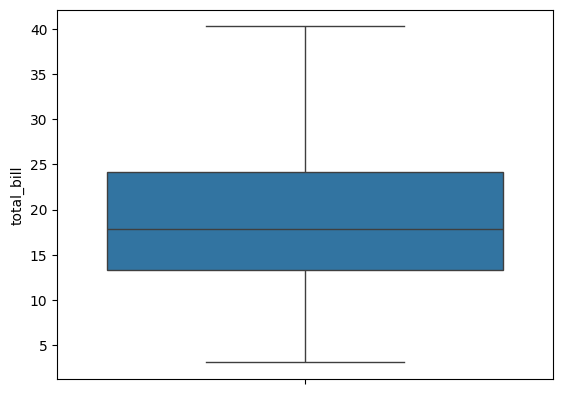

In [21]:
sns.boxplot(df["total_bill"])

In [22]:
df["size"].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [23]:
# Encoding the dataset
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [24]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [25]:
# sex - nominal, smoker - nominal - in these case also we can use map
# day - nominal or ordianl, time - nominal or ordinal
d = {"Male":0, "Female":1}
df["sex"]=df["sex"].map(d)

In [26]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [27]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [29]:
d1 = {"No":0, "Yes":1}
df["smoker"]=df["smoker"].map(d1)

In [30]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [31]:
#day - nominal or ordianl, time - nominal or ordinal
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [33]:
d2 = {"Thur":0, "Fri":1,"Sat":2,"Sun":3}
df["day"]=df["day"].map(d2)

In [34]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [35]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [37]:
d4 = {"Lunch":0, "Dinner":1}
df["time"]=df["time"].map(d4)

In [38]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,3,1,2
1,10.34,1.66,0,0,3,1,3
2,21.01,3.50,0,0,3,1,3
3,23.68,3.31,0,0,3,1,2
4,24.59,3.61,1,0,3,1,4


In [39]:
# I have to separate independent and dependent variable
X = df[["total_bill","sex","smoker","day","time","size"]]
y = df["tip"]

In [40]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,1,0,3,1,2
1,10.34,0,0,3,1,3
2,21.01,0,0,3,1,3
3,23.68,0,0,3,1,2
4,24.59,1,0,3,1,4


In [42]:
print(type(y))

<class 'pandas.core.series.Series'>


In [43]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [45]:

pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp39-cp39-macosx_10_9_x86_64.whl (12.1 MB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached scipy-1.13.1-cp39-cp39-macosx_10_9_x86_64.whl (39.4 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
You should consider upgrading via the '/Users/shaikmujeeburrahman/Downloads/multiple_linear/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [46]:
# let's split the data into 75 % and 25% for testing
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [48]:
# Model Training
# X_train,y_train
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [49]:
# we use to train the model - fit
lin.fit(X_train,y_train)

LinearRegression()

In [50]:
# Prediction
# X_test - will give y_pred
y_pred = lin.predict(X_test)

# later we compare y_pred with y_test using cost function- mse,rmse

In [51]:
# using mse or rmse
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

np.float64(0.9210092773851077)

In [53]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [54]:
rmse

np.float64(0.9596922826537201)

In [55]:
# binary form - searlization
import joblib
joblib.dump(lin, "tips.pkl")

['tips.pkl']

In [56]:
X.columns

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [57]:
{"Thur":0, "Fri":1,"Sat":2,"Sun":3}["Thur"]

0

In [58]:
np.__version__

'2.0.2'

In [59]:
pd.__version__

'2.2.3'

In [60]:
import sklearn
sklearn.__version__

'1.5.2'

In [61]:
joblib.__version__

'1.4.2'

In [62]:
sns.__version__

'0.13.2'

In [63]:
import streamlit as st
st.__version__

ModuleNotFoundError: No module named 'streamlit'